In [1]:
import warnings as _wrn
import numpy as _nmp
import numpy.random as _rnd
import matplotlib.pyplot as _plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

_wrn.filterwarnings('always')
_plt.style.use('ggplot')

In [3]:
import eQTLseq as _assoc

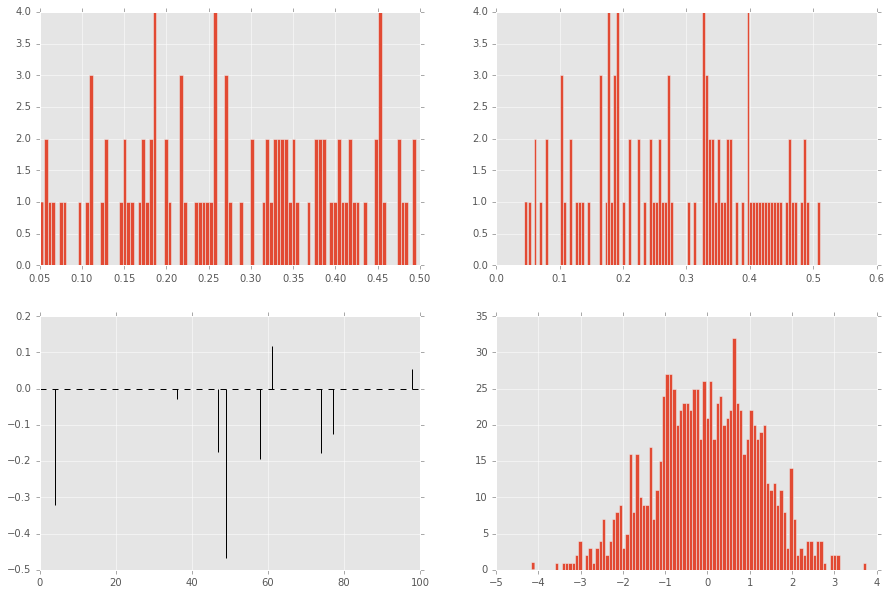

In [5]:
def fcn(n_samples, n_markers, n_markers_causal, MAF_range):
    data_geno = _assoc.simulate_genotypes(n_samples, n_markers, MAF_range) 
    data_pheno = _assoc.simulate_phenotypes(data_geno['G'], kind='Trait', mdl = 'Normal', n_markers_causal = n_markers_causal)

    _plt.figure(figsize = (15,10))
    _plt.subplot(2,2,1); _plt.hist(data_geno['MAF'], 100);
    _plt.subplot(2,2,2); _plt.hist(data_geno['G'].sum(0) / (2 * data_geno['G'].shape[0]), 100);
    _plt.subplot(2,2,3); _plt.vlines(range(data_pheno['coefs'].size), 0, data_pheno['coefs']); _plt.axhline(linestyle='--', color='k')
    _plt.subplot(2,2,4); _plt.hist(data_pheno['Y'], 100);
    
    return data_geno, data_pheno

##
data_geno, data_pheno = fcn(n_samples = 1000, 
                            n_markers = 100, n_markers_causal = 10, 
                            MAF_range=[0.05, 0.5])

In [6]:
traces, estim = _assoc.run(data_pheno['Y'], data_geno['G'], kind = 'Trait', alg = 'VB', n_iters = 1000)

AttributeError: 'ModelTraitNormalVB' object has no attribute 'zeta'

In [ ]:
_plt.figure(figsize = (15, 10))

_plt.subplot(2,2,1); _plt.plot(_nmp.log(traces[1:,:2]));
_plt.subplot(2,2,2); _plt.plot(traces[1:,2]);

_plt.subplot(2,1,2); 
_plt.vlines(range(data_pheno['coefs'].size), 0, data_pheno['coefs']); 
_plt.axhline(linestyle='--', color='k');
_plt.plot(estim['beta'], 'r.'); 

In [ ]:
A = _nmp.random.rand(10,2)
x = _nmp.random.rand(2)